### **4.1 An Overview of Classification** 

##### **The Libraries**

In [ ]:
#Importing the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc, log_loss
from sklearn import preprocessing
from sklearn import neighbors

from scipy import stats

#import scikitplot as skplt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from ipywidgets import widgets

#from classification_helper import print_classification_statistics, plot_ROC, print_OLS_error_table, plot_classification

%matplotlib inline
plt.style.use('seaborn-white')

##### **The Data Set**

In [ ]:
#Importing the Dataset
url="https://raw.githubusercontent.com/pedvide/ISLR_Python/master/Data/Default.csv"
df=pd.read_csv(url)
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [ ]:
#Adding two columns that contain numerical version of 'default' data and 'student' data where Yes=1 and No=0
df['default2']=df.default.factorize()[0]
df['student2']=df.student.factorize()[0]
df

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


##### **Visualizing the relationship between the predictor `balance` and the response `default`.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


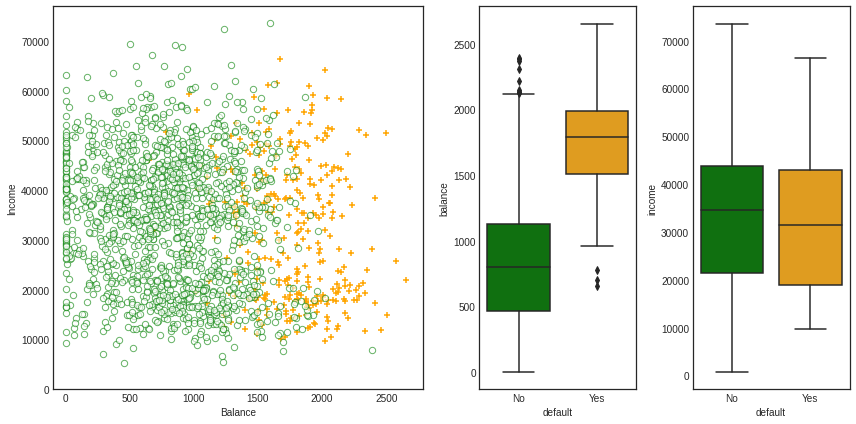

In [ ]:
fig=plt.figure(figsize=(12,6))
gs=mpl.gridspec.GridSpec(1,4)
ax1=plt.subplot(gs[0,:-2])
ax2=plt.subplot(gs[0,-2])
ax3=plt.subplot(gs[0,-1])

#Take a fraction of the samples where target value (default) is 'no'
df_no=df[df.default2==0].sample(frac=0.15)
#Take all samples  where target value is 'yes'
df_yes=df[df.default2==1]
df_=df_no.append(df_yes)

ax1.scatter(df_[df_.default=='Yes'].balance,df_[df_.default=='Yes'].income,s=40,c='orange',marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default=='No'].balance,df_[df_.default=='No'].income,s=40,marker='o',linewidths='1',
            edgecolors='green',facecolors='white',alpha=.6) 

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette={'No':'green','Yes':'orange'}
sns.boxplot('default','balance',data=df,orient='v',ax=ax2,palette=c_palette)
sns.boxplot('default','income',data=df,orient='v',ax=ax3,palette=c_palette)
gs.tight_layout(plt.gcf())

### **4.2 Why Not Linear Regression? & 4.3 Logistic Regression**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


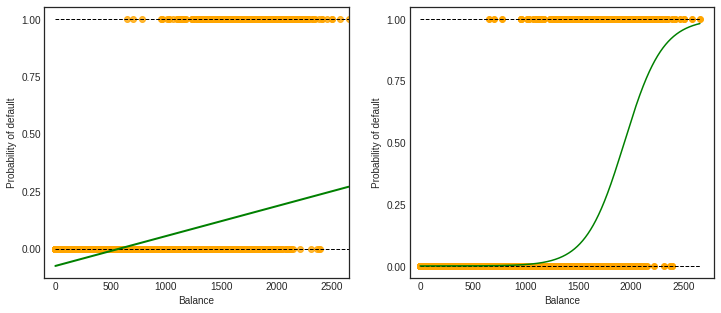

In [ ]:
X_train = df.balance.values.reshape(-1,1) 
y = df.default2

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
sns.regplot(df.balance, df.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'green', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='green')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)